In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

In [4]:
print("Features (X):")
print(X.head())
print("\n")

Features (X):
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  




In [5]:
print("Target (y):")
print(y.head())
print("\n")

Target (y):
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64




In [6]:
print("Missing values in dataset:")
print(X.isnull().sum())

Missing values in dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 16512 samples
Test set size: 4128 samples


In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [11]:
results = {}

In [12]:
for name, model in models.items():
    print(f"--- Training {name} ---")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {'MSE': mse, 'R-squared': r2}
    
    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R2 Score): {r2:.4f}\n")

--- Training Linear Regression ---
Model: Linear Regression
Mean Squared Error (MSE): 0.5559
R-squared (R2 Score): 0.5758

--- Training Ridge Regression ---
Model: Ridge Regression
Mean Squared Error (MSE): 0.5559
R-squared (R2 Score): 0.5758

--- Training Decision Tree ---
Model: Decision Tree
Mean Squared Error (MSE): 0.4940
R-squared (R2 Score): 0.6230

--- Training Random Forest ---
Model: Random Forest
Mean Squared Error (MSE): 0.2552
R-squared (R2 Score): 0.8053



In [13]:
results_df = pd.DataFrame(results).T.sort_values(by='R-squared', ascending=False)

print("--- Model Comparison ---")
print(results_df)

--- Model Comparison ---
                        MSE  R-squared
Random Forest      0.255170   0.805275
Decision Tree      0.493969   0.623042
Ridge Regression   0.555855   0.575816
Linear Regression  0.555892   0.575788


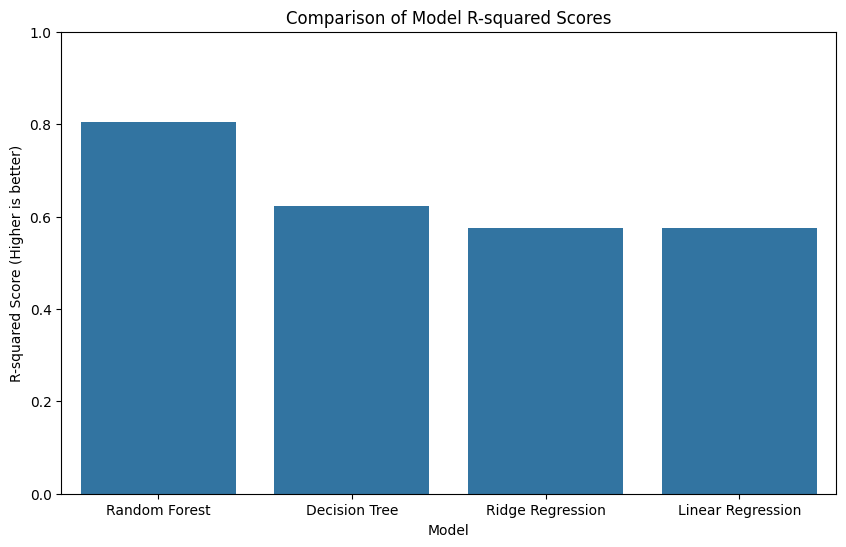

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R-squared'])
plt.title('Comparison of Model R-squared Scores')
plt.xlabel('Model')
plt.ylabel('R-squared Score (Higher is better)')
plt.ylim(0, 1) # R-squared is between 0 and 1
plt.show()

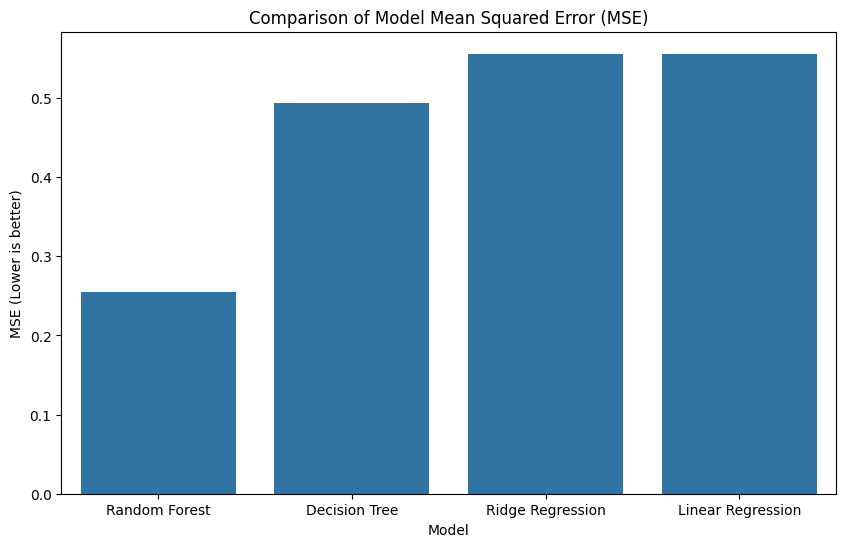

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['MSE'])
plt.title('Comparison of Model Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE (Lower is better)')
plt.show()